In [2]:
# Install DDetector library
!pip install DDetector

In [3]:
from sklearn import datasets
from tests import *
from sklearn.model_selection import train_test_split as ts
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(456)
# import data
boston = datasets.load_boston()
    
# Get features as the X matrix form
X = boston.data

# Split data into trian and test parts
X_train, X_test = ts(X, test_size=0.3)

In [4]:
# Using DDetector to detector the gap of train and test data
from DDetector import detector

In [5]:
# Using SVM to detector the gap
traindata_confidence, testdata_confidence = detector.svm_test(X_train, X_test, confidence_score=True) 

# confidence is used to measure the probability of data belonged to train or test part
print(traindata_confidence[:5])

The similarity of train and test data is: 56.58% 
[-1.00018533 -1.0000487  -1.00029592 -0.99755119 -1.00033995]


In [6]:
# Using KNN to detector the gap
detector.knn_test(X_train, X_test)

The similarity of train and test data is: 71.05% 


In [7]:
# Using KMeans to detector the gap
detector.kmeans_test(X_train, X_test)


The similarity of train and test data is: 73.68% 


In [8]:
# Using Linear Model to detector the gap
detector.LR_test(X_train, X_test, max_iter=1e5)


The similarity of train and test data is: 64.47% 


In [9]:
# Using Ridge Model to detector the gap
detector.ridge_test(X_train, X_test, normalize=False)


The similarity of train and test data is: 57.89% 


In [10]:
# Using Naive Bayes Model to detector the gap
detector.CNB_test(X_train, X_test, normalize=False)


The similarity of train and test data is: 89.47% 


In [11]:
# Using Decision Tree to detector the gap
detector.DecTree_test(X_train, X_test)

The similarity of train and test data is: 71.05% 


In [12]:
# Using Random Forest to detector the gap
detector.RT_test(X_train, X_test, n_estimators=3, max_depth=5, confidence_score=False)

The similarity of train and test data is: 72.37% 


# An approach to use confidence for improving the performance of models

In [13]:
# An example about using the confidence to improve the performance of models
from sklearn import datasets
from tests import *
from sklearn.model_selection import train_test_split as ts
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

np.random.seed(456)

# save res
score_with_confidence_series = []
score_without_confidence_series = []

# import data
breast_cancer = datasets.load_breast_cancer()
    
# Get features as the X matrix form
X = breast_cancer.data
Y = breast_cancer.target
# Split data into trian and test parts
X_train, X_test, Y_train, Y_test = ts(X, Y, test_size=0.5)

for intensity in range(10, 50):
    intensity *= .01
    print('intensity %.2f' % intensity, end=' : ')
    # Added noise to the test data (generate the gap of data)
    X_test_with_noise = X_test + intensity * np.random.random(X_test.shape)

    # Get the confidences
    train_confidence, test_confidence = detector.LR_test(X_train, X_test_with_noise, max_iter=1e3, confidence_score=True)
    train_confidence, test_confidence = train_confidence.reshape(-1, 1), test_confidence.reshape(-1, 1)
    # train_confidence *= .1
    # test_confidence *= .1
    
    # Add confidences into the raw data
    X_train_with_confidence = np.concatenate([X_train, train_confidence], axis=1)
    X_test_with_confidence = np.concatenate([X_test_with_noise, test_confidence], axis=1)

    # Create model
    clf = DecisionTreeClassifier(max_depth=None)
    # clf = LogisticRegression(max_iter=1e3)

    # Using data without confidence to train
    clf.fit(X_train, Y_train)
    score_without_confidence = clf.score(X_test_with_noise, Y_test)
    score_without_confidence_series.append(score_without_confidence)

    # Using data without confidence to train
    clf.fit(X_train_with_confidence, Y_train)
    score_with_confidence = clf.score(X_test_with_confidence, Y_test)
    score_with_confidence_series.append(score_with_confidence)

intensity 0.10 : The similarity of train and test data is: 9.36% 
intensity 0.11 : The similarity of train and test data is: 1.17% 
intensity 0.12 : The similarity of train and test data is: 11.70% 
intensity 0.13 : The similarity of train and test data is: 7.02% 
intensity 0.14 : The similarity of train and test data is: 4.68% 
intensity 0.15 : The similarity of train and test data is: 4.68% 
intensity 0.16 : The similarity of train and test data is: 4.68% 
intensity 0.17 : The similarity of train and test data is: 3.51% 
intensity 0.18 : The similarity of train and test data is: 3.51% 
intensity 0.19 : The similarity of train and test data is: 2.34% 
intensity 0.20 : The similarity of train and test data is: 2.34% 
intensity 0.21 : The similarity of train and test data is: 1.17% 
intensity 0.22 : The similarity of train and test data is: 4.68% 
intensity 0.23 : The similarity of train and test data is: 4.68% 
intensity 0.24 : The similarity of train and test data is: 0.00% 
intensity

Score without confidence: 0.68
Score with confidence: 0.70


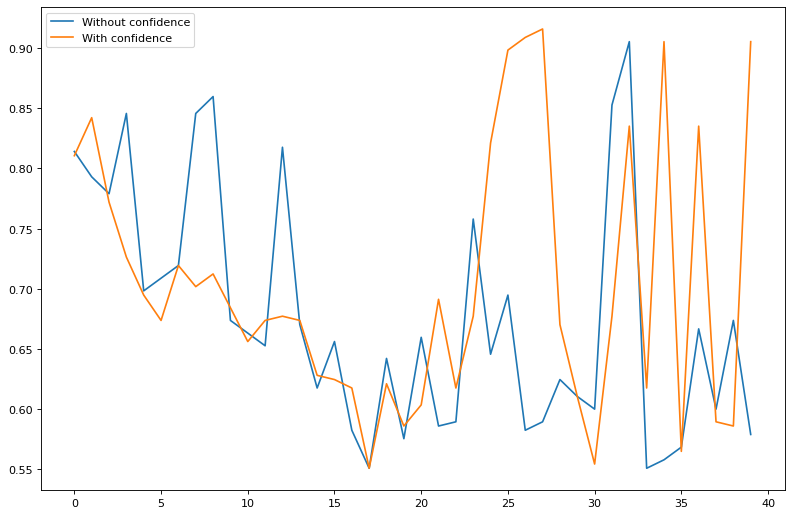

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

print('Score without confidence: %.2f' % np.mean(score_without_confidence_series))
print('Score with confidence: %.2f' % np.mean(score_with_confidence_series))
plt.plot(score_without_confidence_series, label='Without confidence')
plt.plot(score_with_confidence_series, label='With confidence')
plt.legend()
plt.show()